In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

2024-02-26 14:32:08.435457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_load_context_function'

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

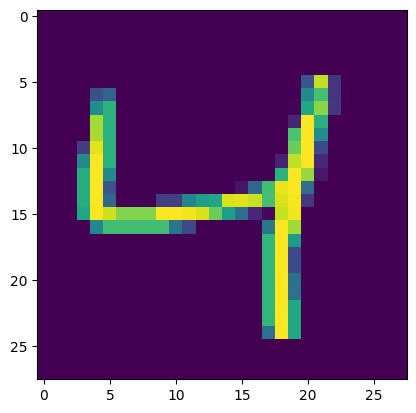

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [13]:
# Making all the values between 0 and 1, as Neural Network tend to perfrom better, when the value are similar
X_train = X_train/255
X_test=X_test/255

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['Accuracy'])

In [28]:
history=model.fit(X_train,y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2796 - Accuracy: 0.9184 - val_loss: 0.1496 - val_Accuracy: 0.9554
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1157 - Accuracy: 0.9660 - val_loss: 0.1000 - val_Accuracy: 0.9707
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0798 - Accuracy: 0.9756 - val_loss: 0.1112 - val_Accuracy: 0.9679
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0599 - Accuracy: 0.9815 - val_loss: 0.0984 - val_Accuracy: 0.9701
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0459 - Accuracy: 0.9856 - val_loss: 0.0869 - val_Accuracy: 0.9767
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0362 - Accuracy: 0.9883 - val_loss: 0.1002 - val_Accuracy: 0.9726
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0284 - Accuracy: 0.9908 - val_loss: 0.0976 - val_Accuracy:

In [29]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [30]:
y_pred = y_prob.argmax(axis=1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9731

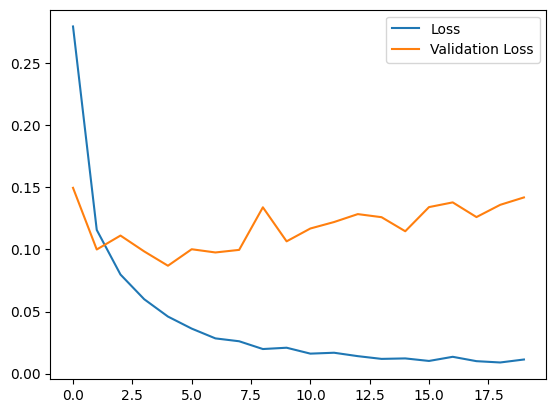

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()


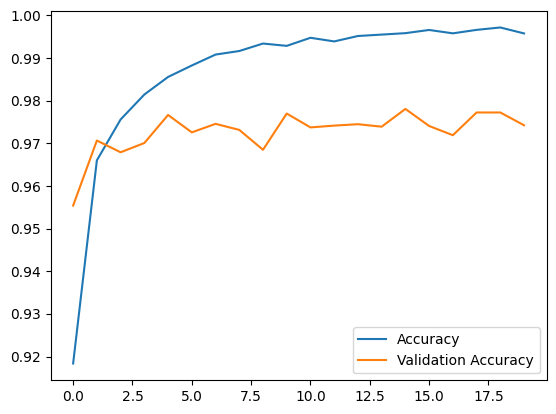

In [34]:
plt.plot(history.history['Accuracy'], label='Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.legend()
